In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [140]:
f1 = pd.read_csv("/content/Live_20210128.csv")

In [141]:
f1

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [142]:
t = f1['status_type']

f1 = f1.iloc[:,8:12]

f1['target'] = t

In [143]:
f1['target'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: target, dtype: int64

In [144]:
f1['target'] = f1['target'].map({'photo':1,'video':2,'status':3,'link':4})

f1.describe()

,num_wows,num_hahas,num_sads,num_angrys,target
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,1.289362,0.696454,0.243688,0.113191,1.461418
std,8.719650,3.957183,1.597156,0.726812,0.636971
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,2.000000
max,278.000000,157.000000,51.000000,31.000000,4.000000


In [145]:
f1.nunique()

num_wows      65
num_hahas     42
num_sads      24
num_angrys    14
target         4
dtype: int64

In [146]:
f1['target'].value_counts()

1    4288
2    2334
3     365
4      63
Name: target, dtype: int64

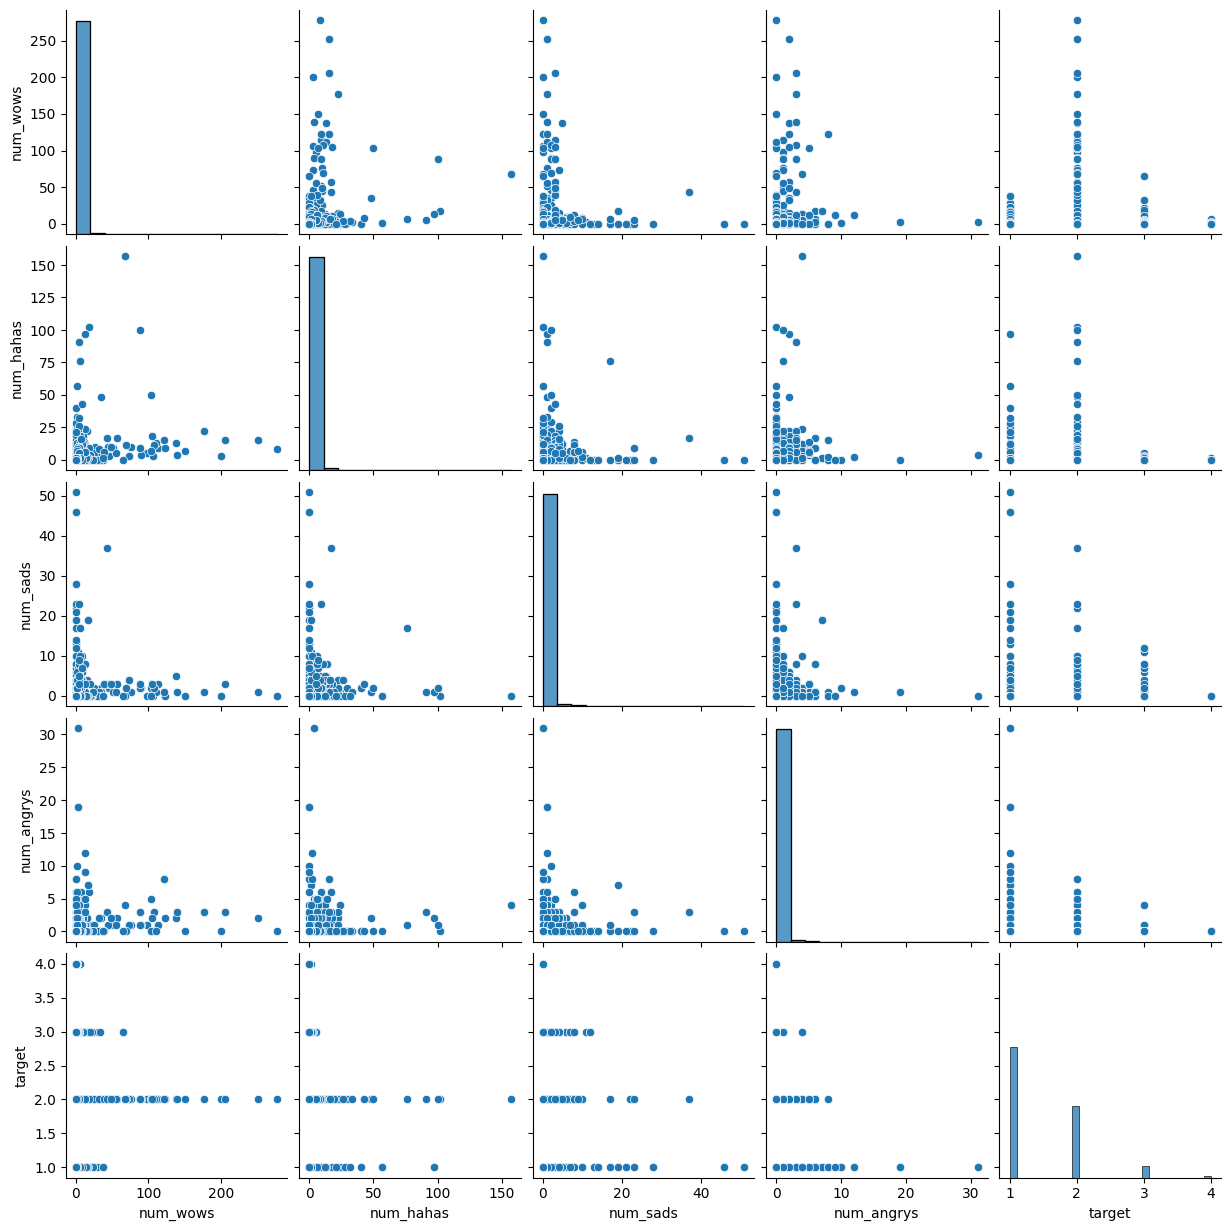

In [147]:
sns.pairplot(f1)

<Axes: ylabel='Frequency'>

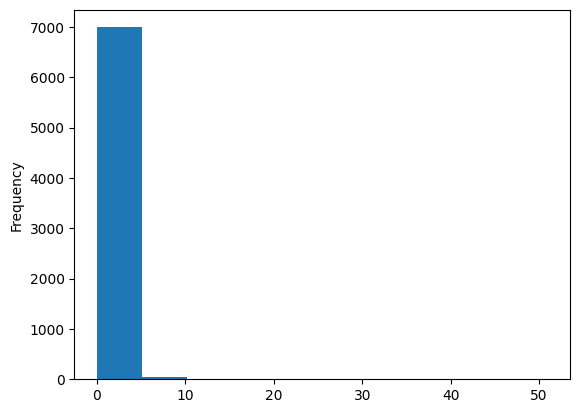

In [148]:
# plt.figure(figsize=[10,30])
f1['num_sads'].plot.hist()

<Axes: >

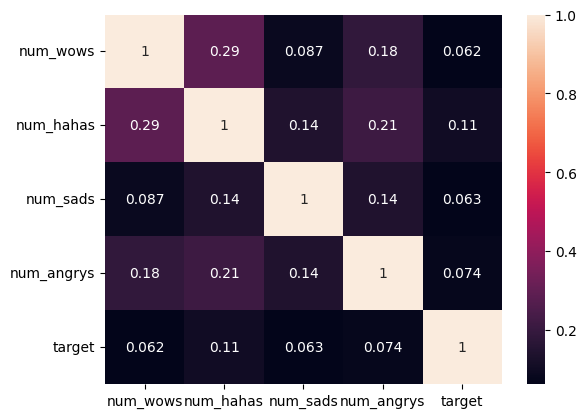

In [149]:
sns.heatmap(f1.corr(),annot=True,robust=True)

In [150]:
ss = StandardScaler()

X1_train = ss.fit_transform(f1.iloc[:,:-1])

Y1 = f1['target']

In [151]:
x_train,x_test,y_train,y_test = train_test_split(X1_train,Y1,random_state=10,test_size=0.2)

In [152]:
pca = PCA(n_components=4)

In [153]:
pca.fit(x_train)

PCA(n_components=4)

In [154]:
x_t_train = pca.transform(x_train)

x_t_test = pca.transform(x_test)

In [155]:
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()

In [156]:
x_t_train[:,0] = lab_enc.fit_transform(x_t_train[:,0])
x_t_train[:,1] = lab_enc.fit_transform(x_t_train[:,1])
x_t_train[:,2] = lab_enc.fit_transform(x_t_train[:,2])
x_t_train[:,3] = lab_enc.fit_transform(x_t_train[:,3])

In [157]:
x_t_train

array([[328., 128., 417., 152.],
       [  0., 161., 199., 206.],
       [  5., 106., 179., 225.],
       ...,
       [  0., 161., 199., 206.],
       [  0., 161., 199., 206.],
       [  0., 161., 199., 206.]])

In [158]:
x_t_train.astype(np.int)

<ipython-input-158-2ca8da2b6791>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_t_train.astype(np.int)


array([[328, 128, 417, 152],
       [  0, 161, 199, 206],
       [  5, 106, 179, 225],
       ...,
       [  0, 161, 199, 206],
       [  0, 161, 199, 206],
       [  0, 161, 199, 206]])

In [159]:
clf = SVC()
clf.fit(x_t_train, y_train)
print ('score', clf.score(x_t_test, y_test))
print ('pred label', clf.predict(x_t_test))

score 0.3453900709219858
pred label [2 2 2 ... 2 2 2]
